In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


In [ ]:
pwd

'C:\\Users\\aarus'

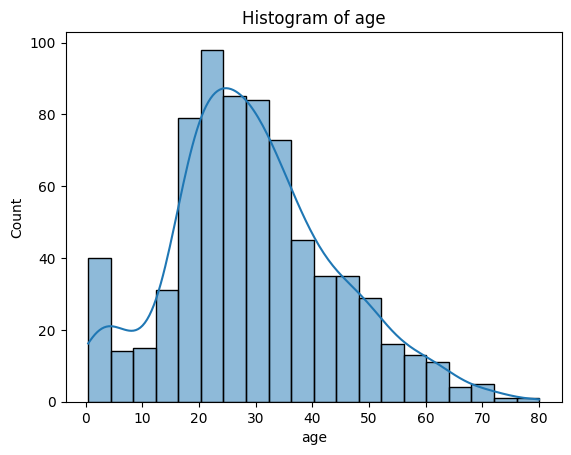

In [3]:
# Read the dataset
data = pd.read_csv('/content/titanic.csv')
# Select a column for analysis (e.g., 'age')
column_name = 'age'

# Remove missing values, if any
data = data.dropna(subset=[column_name])

# Plot a histogram using Seaborn and Matplotlib
sns.histplot(data[column_name], kde=True)
plt.title(f'Histogram of {column_name}')
plt.xlabel(column_name)
plt.ylabel('Count')
plt.show()

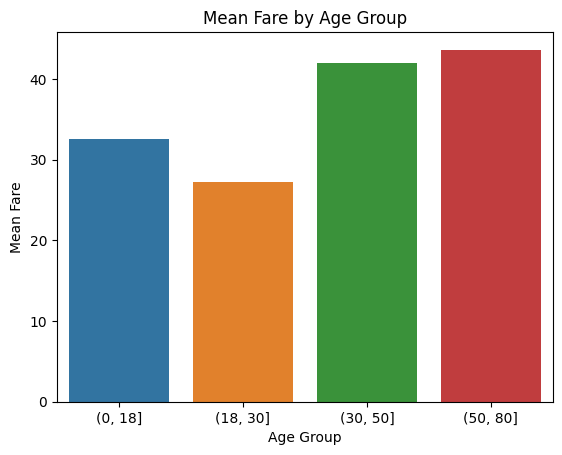

In [4]:
data = pd.read_csv('titanic.csv')

# Remove missing values
data = data.dropna(subset=['fare', 'age'])

# Define age groups
age_groups = pd.cut(data['age'], bins=[0, 18, 30, 50, 80])

# Calculate the mean fares for each age group
mean_fares = data.groupby(age_groups)['fare'].mean().reset_index()

# Plot the bivariate analysis using Seaborn
sns.barplot(x='age', y='fare', data=mean_fares)
plt.title('Mean Fare by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Mean Fare')
plt.show()

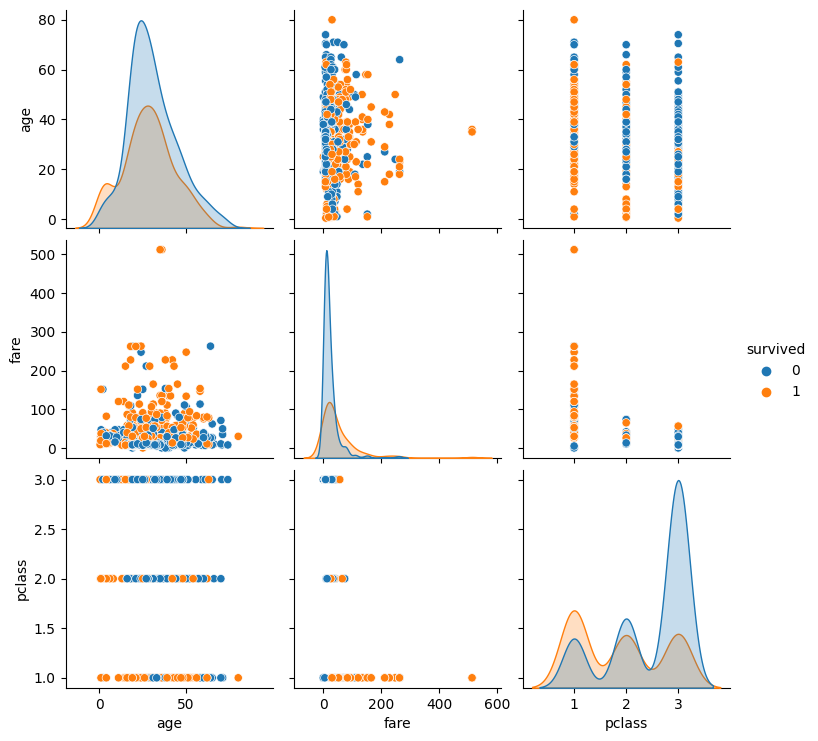

In [5]:
# Select columns for analysis
columns = ['age', 'fare', 'pclass', 'survived']

# Remove missing values
data = data.dropna(subset=columns)

# Subset the data for selected columns
data_subset = data[columns]

# Perform multivariate analysis using pairplot
sns.pairplot(data_subset, hue='survived')

In [6]:
# Select columns for analysis
numeric_columns = ['age', 'fare']
categorical_columns = ['deck', 'pclass']
target_column = 'alive'
comparison_column = 'alone'

# Remove missing values
data = data.dropna(subset=numeric_columns + categorical_columns + [target_column, comparison_column])

# Calculate means and deviations for numeric columns
means = data[numeric_columns].mean()
deviations = data[numeric_columns].std()

# Count the number of survivors and passengers who were alone
survivor_count = data[data[target_column] == 'yes'].shape[0]
alone_count = data[data[comparison_column] == 'yes'].shape[0]

# Display the results
print('Means:')
print(means)
print('\nDeviations:')
print(deviations)
print('\nSurvivors:', survivor_count)
print('Alone:', alone_count)

Means:
age     35.779457
fare    78.931477
dtype: float64

Deviations:
age     15.707436
fare    76.071726
dtype: float64

Survivors: 125
Alone: 0


In [7]:
# Drop rows with missing values in any column except 'deck'
data = data.dropna(subset=data.columns[data.columns != 'deck'])

# Display the modified dataset
print(data)


     survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
1           1       1  female  38.0      1      0  71.2833        C  First   
3           1       1  female  35.0      1      0  53.1000        S  First   
6           0       1    male  54.0      0      0  51.8625        S  First   
10          1       3  female   4.0      1      1  16.7000        S  Third   
11          1       1  female  58.0      0      0  26.5500        S  First   
..        ...     ...     ...   ...    ...    ...      ...      ...    ...   
871         1       1  female  47.0      1      1  52.5542        S  First   
872         0       1    male  33.0      0      0   5.0000        S  First   
879         1       1  female  56.0      0      1  83.1583        C  First   
887         1       1  female  19.0      0      0  30.0000        S  First   
889         1       1    male  26.0      0      0  30.0000        C  First   

       who  adult_male deck  embark_town alive  alone  
1    wo

In [8]:
random_letters = np.random.choice(['A', 'B', 'C', 'D', 'E', 'F', 'G'], size=data['deck'].isnull().sum())
data.loc[data['deck'].isnull(), 'deck'] = random_letters
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,1,female,47.0,1,1,52.5542,S,First,woman,False,D,Southampton,yes,False
872,0,1,male,33.0,0,0,5.0000,S,First,man,True,B,Southampton,no,True
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


In [ ]:
# Select numerical columns for outlier detection and replacement
numerical_columns = ['age', 'fare']

# Calculate Z-scores for the numerical columns
z_scores = np.abs(stats.zscore(data[numerical_columns]))

# Define the threshold for identifying outliers (e.g., Z-score greater than 3)
outlier_threshold = 3

# Find the indices of outliers
outlier_indices = np.where(z_scores > outlier_threshold)

# Replace outliers with NaN or other appropriate values
data.iloc[outlier_indices] = np.nan  # Replace with NaN

# Display the modified dataset
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1.0,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1.0,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1.0,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1,3.0,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1.0,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,1.0,female,47.0,1,1,52.5542,S,First,woman,False,D,Southampton,yes,False
872,0,1.0,male,33.0,0,0,5.0000,S,First,man,True,B,Southampton,no,True
879,1,1.0,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
887,1,1.0,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


In [18]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

categorical_columns = ['sex', 'embarked', 'class', 'who', 'embark_town', 'alive', 'alone', 'adult_male', 'deck']

numerical_columns = data.drop(categorical_columns, axis=1)


# Perform one-hot encoding
onehot_encoder = OneHotEncoder(sparse=False, drop='first')
onehot_encoded = onehot_encoder.fit_transform(data[categorical_columns])
onehot_encoded_df = pd.DataFrame(onehot_encoded, columns=onehot_encoder.get_feature_names_out(categorical_columns))

# Concatenate the encoded dataframes with the numerical dataframe
encoded_data = pd.concat([numerical_columns, onehot_encoded_df], axis=1)

# Display the encoded dataset
print(encoded_data)

     survived  pclass   age  sibsp  parch     fare  sex_male  embarked_Q  \
1         1.0     1.0  38.0    1.0    0.0  71.2833       0.0         0.0   
3         1.0     1.0  35.0    1.0    0.0  53.1000       0.0         0.0   
6         0.0     1.0  54.0    0.0    0.0  51.8625       1.0         0.0   
10        1.0     3.0   4.0    1.0    1.0  16.7000       1.0         0.0   
11        1.0     1.0  58.0    0.0    0.0  26.5500       0.0         0.0   
..        ...     ...   ...    ...    ...      ...       ...         ...   
176       NaN     NaN   NaN    NaN    NaN      NaN       1.0         0.0   
178       NaN     NaN   NaN    NaN    NaN      NaN       1.0         0.0   
179       NaN     NaN   NaN    NaN    NaN      NaN       0.0         0.0   
180       NaN     NaN   NaN    NaN    NaN      NaN       0.0         0.0   
181       NaN     NaN   NaN    NaN    NaN      NaN       1.0         0.0   

     embarked_S  class_Second  ...  embark_town_Southampton  alive_yes  \
1           1

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [19]:
# Separate the dependent and independent variables
dependent_variable = encoded_data['survived']
independent_variables = encoded_data.drop('survived', axis=1)


In [20]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
X= StandardScaler()

# Scale the independent variables
scaled_independent_variables = X.fit_transform(independent_variables)

# Convert the scaled independent variables back to a DataFrame
scaled_independent_variables_df = pd.DataFrame(scaled_independent_variables, columns=independent_variables.columns)

# Display the scaled independent variables
print(scaled_independent_variables_df.head())

     pclass       age     sibsp     parch      fare  sex_male  embarked_Q  \
0 -0.373420  0.152082  0.828576 -0.634159 -0.100110 -1.033529   -0.105409   
1 -0.373420 -0.039875  0.828576 -0.634159 -0.338485 -1.033529   -0.105409   
2 -0.373420  1.175852 -0.726072 -0.634159 -0.354708  0.967559   -0.105409   
3  3.510145 -2.023430  0.828576  0.692472 -0.815672  0.967559   -0.105409   
4 -0.373420  1.431795 -0.726072 -0.634159 -0.686543 -1.033529   -0.105409   

   embarked_S  class_Second  class_Third  ...  embark_town_Southampton  \
0    0.763288     -0.299700    -0.241121  ...                 0.763288   
1    0.763288     -0.299700     4.147288  ...                 0.763288   
2    0.763288     -0.299700    -0.241121  ...                 0.763288   
3    0.763288     -0.299700    -0.241121  ...                 0.763288   
4    0.763288      3.336665    -0.241121  ...                 0.763288   

   alive_yes  alone_True  adult_male_True    deck_B    deck_C    deck_D  \
0   0.692586   -0

In [21]:
from sklearn.model_selection import train_test_split

X = scaled_independent_variables_df
y = independent_variables

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (267, 23)
X_test shape: (67, 23)
y_train shape: (267, 23)
y_test shape: (67, 23)
